# 数据可视化

## 数据科学工作流程

![Data science workflow](https://images.gitbook.cn/305484d0-ddb3-11e8-a810-c56af2994f6b)

## 数据可视化

1. 艺术性可视化

![US VS CHINA](https://images.gitbook.cn/32a92430-331b-11e9-ae61-ab46ecd2ee1c)

2. 数学性可视化

![USA-CHINA-GDP](https://images.gitbook.cn/de12efa0-331a-11e9-bff5-05638cbe7e78)

## 实现途径

1. 艺术性可视化：平面设计师和业务人员的合作。关注表达意图、色彩、图形等
2. 数学工具：数据工程师的工作。关注表达意图、规律等

## 推荐参考读物：

- 《跟老齐学Python：数据分析》（电子工业出版社）

- 《案例上手 Python 数据可视化》https://gitbook.cn/gitchat/column/5c6cd09e7fa9074fde9c8909


## matplotlib

官网：[https://matplotlib.org/](https://matplotlib.org/)

标准方法：`pip install matplotlib`

## Seaborn

官方网站：[https://matplotlib.org/glossary/index.html#term-tk](https://matplotlib.org/glossary/index.html#term-tk)

安装：

```python
pip3 install seaborn
```

## 项目1

绘制头像

练习对坐标轴刻度的控制。

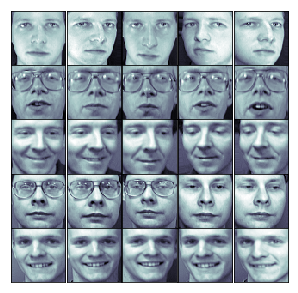

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces().images

fig, ax = plt.subplots(5, 5, figsize=(5, 5))

fig.subplots_adjust(hspace=0, wspace=0) 

for i in range(5):
    for j in range(5):
        ax[i, j].xaxis.set_major_locator(plt.NullLocator())
        ax[i, j].yaxis.set_major_locator(plt.NullLocator())
        ax[i, j].imshow(faces[10*i+j], cmap='bone')

## 项目2

绘制两个相对的纵坐标轴

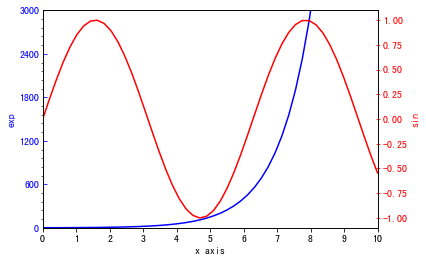

In [3]:
import matplotlib    
matplotlib.rcParams['axes.unicode_minus'] = False    # 设置显示负号

import sys
import numpy as np
from matplotlib.ticker import AutoMinorLocator
x = np.linspace(0, 10, 50)
y1 = np.exp(x)
y2 = np.sin(x)

fig, ax1 = plt.subplots()
ax1.plot(x, y1, "b")
ax1.set_xlabel('x axis')
ax1.set_xlim(0, 10)
ax1.set_xticks(range(11))
ax1.set_ylabel("exp", color='blue')
ax1.set_ylim(0, 3000)    # ⑧
ax1.set_yticks(range(0, 3001, 600))    # ⑨
ax1.yaxis.set_minor_locator(AutoMinorLocator(5))    # ⑩
ax1.tick_params(axis='y', which='major', colors='blue', direction='in')

ax2 = ax1.twinx()
ax2.plot(x, y2, color="red")
ax2.set_ylabel("sin", color="red")
ax2.tick_params(axis='y', colors='red', direction='inout')

## 项目3

绘制柱形图

从数据集https://github.com/qiwsir/DataSet/tree/master/school/school.csv中读取数据

部分大学毕业生薪资统计

In [5]:
import pandas as pd
df = pd.read_csv("/Users/qiwsir/Documents/Codes/DataSet/school/school.csv")
df.sample(5)    # 随机取得5个样本

,School,Women,Men,Gap
18,Emory,68,82,14
10,Duke,93,124,31
8,Yale,79,114,35
17,Berkeley,71,88,17
11,Dartmouth,84,114,30


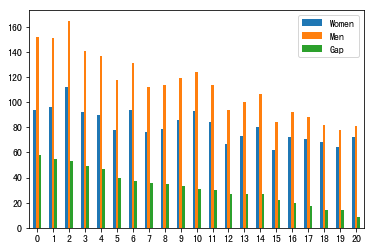

In [6]:
# dataframe对象的绘图接口
df.plot.bar(rot=0)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


Text(0, 0.5, '毕业学校')

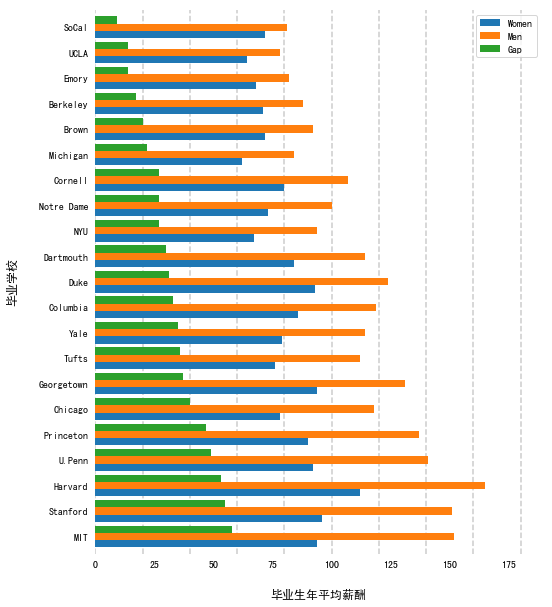

In [7]:
from matplotlib.ticker import StrMethodFormatter

ax = df.plot(kind='barh', x='School', figsize=(8, 10), zorder=2, width=0.85)    # ⑨

#隐藏坐标轴
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# 设置刻度
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# 绘制垂直横轴的虚线
vals = ax.get_xticks()    # ⑩
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='grey', zorder=1)

ax.set_xlabel("毕业生年平均薪酬", labelpad=20, weight='bold', size=12)
ax.set_ylabel("毕业学校", labelpad=20, weight='bold', size=12)

其他图形：
- 柱形图：plt.bar
- 箱线图：plt.boxplot
- 饼图：plt.pie
- 直方图：plt.hist

## 项目4

分析马拉松跑步数据

In [9]:
import pandas as pd
marathon = pd.read_csv("/Users/qiwsir/Documents/Codes/DataSet/marathon/marathon.csv")
marathon.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [10]:
marathon.info()    # 了解数据

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37250 entries, 0 to 37249
Data columns (total 4 columns):
age       37250 non-null int64
gender    37250 non-null object
split     37250 non-null object
final     37250 non-null object
dtypes: int64(1), object(3)
memory usage: 1.1+ MB


In [11]:
# 特征工程

# 将split/final特征转换为时间类型

import datetime
def convert_time(s):
    h,m,s = map(int, s.split(":"))
    return datetime.timedelta(hours=h, minutes=m, seconds=s)

In [12]:
# 将上述函数用于读取数据的函数之中
marathon = pd.read_csv("/Users/qiwsir/Documents/Codes/DataSet/marathon/marathon.csv", 
                       converters={"split":convert_time, "final":convert_time})

marathon.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

In [13]:
# 将时间间隔的表述转化为整数，比如以秒为单位的整数。
d = datetime.timedelta(hours=1,minutes=0,seconds=0)
df = pd.DataFrame({'time':[d]})
df.astype(int)

,time
0,3600000000000


In [14]:
# 这个结果不是以秒为单位的，而是以“纳秒”（ns）为单位
# 得到以秒为单位的整数
d = datetime.timedelta(hours=1,minutes=0,seconds=0)
df = pd.DataFrame({'time':[d]})
df.astype(int) * 1e-9

,time
0,3600.0


In [15]:
# 将split和final的特征值转化为秒为单位的整数
marathon['split_sec'] = marathon['split'].astype(int) * 1e-9
marathon['final_sec'] = marathon['final'].astype(int) * 1e-9
marathon.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,01:05:38,02:08:51,3938.0,7731.0
1,32,M,01:06:26,02:09:28,3986.0,7768.0
2,31,M,01:06:49,02:10:42,4009.0,7842.0
3,38,M,01:06:16,02:13:45,3976.0,8025.0
4,31,M,01:06:32,02:13:59,3992.0,8039.0


In [16]:
# 统计各个特征

marathon.describe()

,age,split,final,split_sec,final_sec
count,37250.000000,37250,37250,37250.000000,37250.000000
mean,40.697369,0 days 02:03:54.425664,0 days 04:48:09.303597,7434.425664,17289.303597
std,10.220043,0 days 00:22:55.093889,0 days 01:03:32.145345,1375.093890,3812.145345
min,17.000000,0 days 01:05:21,0 days 02:08:51,3921.000000,7731.000000
25%,33.000000,0 days 01:48:25,0 days 04:02:24,6505.000000,14544.000000
50%,40.000000,0 days 02:01:13,0 days 04:44:25,7273.000000,17065.000000
75%,48.000000,0 days 02:16:11,0 days 05:27:36,8171.000000,19656.000000
max,86.000000,0 days 04:59:49,0 days 10:01:08,17989.000000,36068.000000


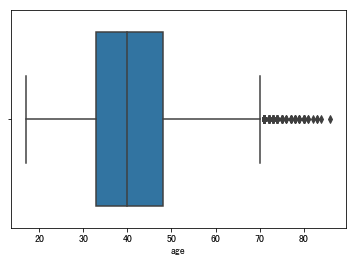

In [17]:
# 对特征age绘制箱线图，寻找离群值，即高龄运动员

%matplotlib inline
import seaborn as sns
ax = sns.boxplot(x=marathon['age'])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


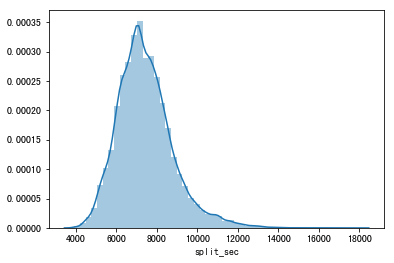

In [18]:
# 通过直方图，研究数据分布，比如split_sec和final_sec
sns.distplot(marathon['split_sec'])

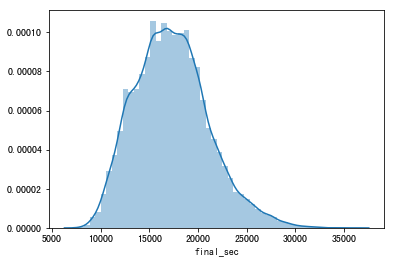

In [19]:
sns.distplot(marathon['final_sec'])

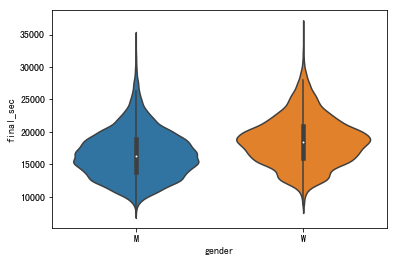

In [20]:
# 把gender这个分类特征添加进来，分析上述半程和全程

sns.violinplot(x='gender', y='final_sec', data=marathon)

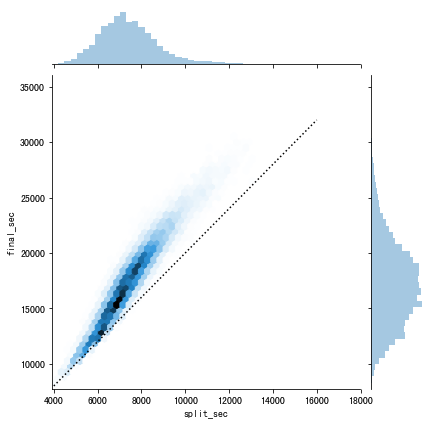

In [21]:
# 好的选手是后半程用时和前半程应该近似。所以，我们也来研究一下，在marathon数据集中，这些运动员的前后半程用时情况。

g = sns.jointplot("split_sec", "final_sec", data=marathon, kind='hex')   #or: kind='scatter'

#绘制一条直线，作为参考
import numpy as np
g.ax_joint.plot(np.linspace(4000, 16000), np.linspace(8000, 32000), ":k")   

In [22]:
# 对半程情况深入统计

marathon['split_frac'] = 1 - 2 * marathon['split_sec'] / marathon["final_sec"]
marathon.head()

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,01:05:38,02:08:51,3938.0,7731.0,-0.018756
1,32,M,01:06:26,02:09:28,3986.0,7768.0,-0.026262
2,31,M,01:06:49,02:10:42,4009.0,7842.0,-0.022443
3,38,M,01:06:16,02:13:45,3976.0,8025.0,0.009097
4,31,M,01:06:32,02:13:59,3992.0,8039.0,0.006842


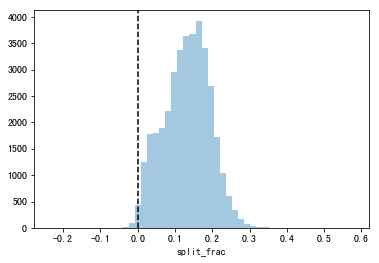

In [23]:
import matplotlib.pyplot as plt
sns.distplot(marathon['split_frac'], kde=False)
plt.axvline(0, color='k', linestyle="--")   # 垂直于x轴的直线，0表示x轴位置

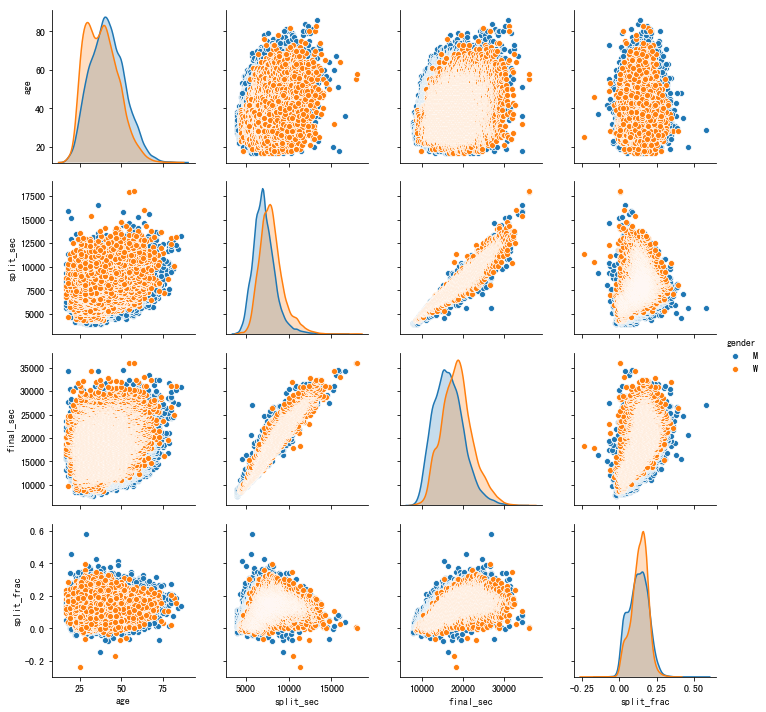

In [24]:
# 不同特征的关系

sns.pairplot(data=marathon, 
             vars=['age', 'split_sec', 'final_sec', 'split_frac'], 
             hue='gender')

In [25]:
# 80岁以上的选手
(marathon.age >= 80).sum()

15

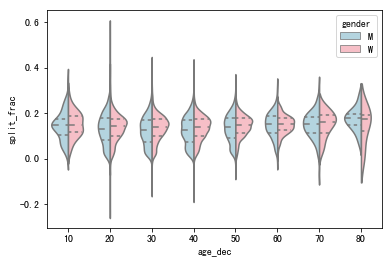

In [26]:
# 划分年龄段
marathon['age_dec'] = marathon['age'].map(lambda age: 10 * (age // 10))
sns.violinplot(x="age_dec", y="split_frac", hue="gender", data=marathon, 
               split=True, inner='quartile', palette=['lightblue', 'lightpink'])    # 半程占比

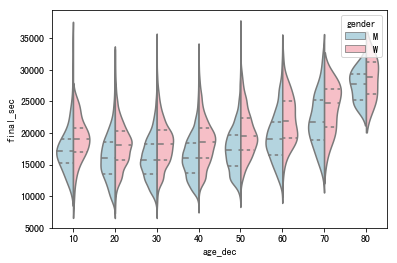

In [27]:
# 不同年龄段全程用时
sns.violinplot(x="age_dec", y="final_sec", hue="gender", data=marathon, 
               split=True, inner='quartile', palette=['lightblue', 'lightpink'])

## 作业1

可视化Pokeman数据

本案例的数据集下载地址：https://github.com/qiwsir/DataSet/tree/master/pokemon

## Pyecharts

Pyecharts官方网站：http://pyecharts.org/

In [1]:
# 应用示例

from pyecharts import Bar                               # ①

clothes = ["衬衫", "羊毛衫", "雪纺衫", "裤子", "高跟鞋", "袜子"]
clothes_v1 = [5, 20, 36, 10, 75, 90]
clothes_v2 = [10, 25, 8, 60, 20, 80]

bar = Bar("柱状图数据堆叠示例")                            # ②
bar.use_theme('dark')                                   # ③
bar.add("Shop-A", clothes, clothes_v1, is_stack=True)   # ④
bar.add("Shop-B", clothes, clothes_v1, is_stack=True)   
bar     

In [2]:
import pandas as pd
appl_df = pd.read_csv("/Users/qiwsir/Documents/Codes/DataSet/appl/appl.csv", 
                      index_col=['date'], parse_dates=['date'])
df20 = appl_df.iloc[:20, :]

bar = Bar('苹果公司近日股票收盘价')
bar.add("", df20.index, df20['open'], is_label_show=True, datazoom_type='both', is_datazoom_show=True)
bar

In [3]:
# 蜡烛图（K线图）

from pyecharts import Kline
kline = Kline("K线图")
kline.add("APPL", df20.index, df20[['open','close','high','low']].values,
          mark_line = ['max'],
          datazoom_orient="vertical",
          is_datazoom_show=True,
         )
kline

In [4]:
from pyecharts import Gauge
gauge = Gauge("仪表盘示例")
gauge.add(
    "业务指标",
    "完成率",
    166.66,
    angle_range=[180, 0],
    scale_range=[0, 200],
    is_legend_show=False,
)
gauge

In [5]:
from pyecharts import Liquid

liquid = Liquid("水球图示例")
liquid.add("Liquid", [0.6])
liquid

# 项目5

地理信息可视化

首先，要安装地图文件，安装方法如下：

```bash
$ pip install echarts-countries-pypkg         # 全球国家地图
$ pip install echarts-china-provinces-pypkg   # 中国省级地图
$ pip install echarts-china-cities-pypkg      # 中国市级地图
$ pip install echarts-china-counties-pypkg    # 中国县区地图
$ pip install echarts-china-misc-pypkg        # 中国区域地图
```

不仅仅可以安装上述官方提供的地图文件，还能够自己制作个性化的地图扩展，具体请参阅：http://pyecharts.org/#/zh-cn/customize_map

In [6]:
# PM2.5，空气质量

import pandas as pd
from pyecharts import Geo

df = pd.read_csv("/Users/qiwsir/Documents/Codes/DataSet/pm25/pm2.csv")
city = df['CITY_NAME']
value = df['Exposed days']

geo = Geo("主要城市空气质量", "pm2.5", title_color = "#666666", title_pos = "center", 
          width=800, height=600, background_color = "#404a59")
geo.add("PM2.5", city, value, visual_range=[0, 300], visual_text_color='#fff', symbol_size=16, is_visualmap=True)
geo

In [7]:
# 江苏省各城市

js = pd.read_csv("/Users/qiwsir/Documents/Codes/DataSet/jiangsu/city_population.csv")
js_cities = [name[:-1] for name in js.name]

jspm = df[df['CITY_NAME'].isin(js_cities)]

geo = Geo(
    "江苏城市空气质量",
    "",
    title_color="#202020",
    title_pos="center",
    width=800,
    height=600,
    background_color="#666666",
)

geo.add(
    "",
    jspm['CITY_NAME'],
    jspm['Exposed days'],
    maptype="江苏",
    type="effectScatter",
    is_random=True,
    effect_scale=5,
    is_legend_show=False,
)
geo

In [8]:
# 房价分布热图

hp = pd.read_csv("/Users/qiwsir/Documents/Codes/DataSet/house/houseprice.csv")
hp['mean'] = hp.mean(axis=1)
hp.drop(index=46, inplace=True)    # 有城市在默认安装的地图文件中没有，将其删除
geo = Geo("主要城市房产均价", "", title_color='#111111', width=800, height=600)
geo.add('PRICE', hp['city_name'], hp['mean'], 
        visual_range=[2000, 40000], symbol_size=20, 
        is_visualmap=True, type="heatmap")
geo

## 作业2

利用pyechart制作地理信息图，如春运图示、高校分布图示等